# Classification

In [1]:
# Import Dataset
from sklearn.datasets import fetch_mldata

In [2]:
# Load Dataset
mnist_data = fetch_mldata('MNIST original')

In [3]:
# Check loaded dataset
mnist_data

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

The datasets loaded using Scikit-Learn usually have the structure in which they have:

1. "DESCR" key describing the dataset
2. "COL_NAMES" key describing the name of the available columns
3. "target" key that is the labels for our dataset
4. "data" key that is the feature points for the dataset

In [4]:
# Separate Features and Targets

# Features
X = mnist_data['data']

# Labels/Target
y = mnist_data['target']

In [5]:
# Shape of Features
X.shape

(70000, 784)

In [6]:
# Shape of Labels
y.shape

(70000,)

This tells us that there are 70,000 images in the dataset and each image has 784 features as each image is 28 x 28 pixels and each feature represents one pixel's intensity.

Let's plot a sample feature image. For that we'll have to reshape it into a 28x28 array and plot it.

In [7]:
# Import Dependencies
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# Take a random digit from dataset features
n = np.random.randint(0,X.shape[0],1)

# Get random image data
random_img = X[n]

# Reshape data into 28x28 array to be shown as image
random_img = random_img.reshape(28,28)

In [9]:
# Shape of random_img
random_img.shape

(28, 28)

(-0.5, 27.5, 27.5, -0.5)

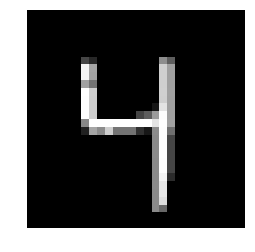

In [10]:
# Plot the random image
plt.imshow(random_img, cmap='gray')
plt.axis('off')

In [11]:
# Let's check the corresponding label for this number
random_img_label = y[n]

random_img_label

array([4.])

Before inspecting the data further, we should create a train and test dataset so that we do not see the test data till the very end.

In [12]:
# Train Test Split
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [13]:
# Check the split data
X_train.shape, y_train.shape

((60000, 784), (60000,))

In [14]:
X_test.shape, y_test.shape

((10000, 784), (10000,))

In [15]:
# Also, let's shuffle the data so that the cross-validation folds will be similar in the future
shuffle_idx = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_idx], y_train[shuffle_idx]

# Training a Binary Classifier

Now, that we have shuffled the training data and the labels, let's train a simple Binary Classifier to detect a "9".

In [16]:
# Binary Classifier
# True: for all 9's and False: for all the rest
y_train_9 = (y_train == 9)
y_test_9 = (y_test == 9)

In [17]:
y_train_9.shape

(60000,)

In [18]:
y_test_9.shape

(10000,)

In [19]:
# Import SGD CLassifier
from sklearn.linear_model import SGDClassifier

# Train a Stochastic Gradient Classifier
# SGDClassifier relies on randomness during training, hence the name 'stochastic'
clf = SGDClassifier(random_state = 101)
clf.fit(X_train, y_train_9)

c:\users\hare krishna\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=101, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [20]:
# Now use this classifier to see if it can detect a 9

# Get a random Number
n = np.random.randint(0,X_test.shape[0],1)

# Make a prediction for that digit that if that is a 9 or not
clf.predict(X_test[n])

array([False])

In [21]:
# So, what was the original test label for that number
y_test[n]

array([0.])

# Performance Measures

## Measuring Accuracy using Cross-Validation

### Cross Validation Implementation

In [22]:
# Import Dependencies
# StratifiedKFold: Performs stratified sampling to produce folds that contain a representative ratio of each class
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [23]:
# Initialize StraitifiedKFold
# n_splits: Number of Folds
skfolds = StratifiedKFold(n_splits=3, random_state=101)

In [24]:
# At each iteration, create a Clone of the classifier, train the Clone on training folds and make predicitons on test fold.
for train_idx, test_idx in skfolds.split(X_train, y_train_9):
    # Create a clone of the classifier
    clf_clone = clone(clf)
    # Create X_train folds
    X_train_folds = X_train[train_idx]
    # Create y_train folds
    y_train_folds = y_train_9[train_idx]
    # Create X_test_fold : Validation Set
    X_test_fold = X_train[test_idx]
    # Create y_test_fold : Validation Set
    y_test_fold = y_train_9[test_idx]
    
    print('\nData Shape:')
    print(X_train_folds.shape, y_train_folds.shape)
    print(X_test_fold.shape, y_test_fold.shape)
    print('\n')
    
    # Train the Cloned Classifier on Training Data and Evaluate it's performance on Validation Data
    clf_clone.fit(X_train_folds,y_train_folds)
    # Predicted Labels
    y_pred = clf_clone.predict(X_test_fold)
    # Number of Correct Predictions
    num_correct = sum(y_pred == y_test_fold)
    # Print Accuracy for 3 Cross-Validation Splits
    print('Accuracy: ',num_correct/len(y_pred))


Data Shape:
(40000, 784) (40000,)
(20000, 784) (20000,)




c:\users\hare krishna\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Accuracy:  0.93505

Data Shape:
(40000, 784) (40000,)
(20000, 784) (20000,)




c:\users\hare krishna\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Accuracy:  0.93765

Data Shape:
(40000, 784) (40000,)
(20000, 784) (20000,)




c:\users\hare krishna\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Accuracy:  0.9405


In [25]:
# Using Scikit-Learn's Cross_val_score function to verify the above functionality
from sklearn.model_selection import cross_val_score

# Get Cross_val_score on trainig data with 3 splits
cross_val_score(clf, X_train, y_train_9, cv=3, scoring='accuracy')

c:\users\hare krishna\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\hare krishna\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will

array([0.93505, 0.93765, 0.9405 ])

Using Cross-Validation, we got an accuracy score of about 95% but since ***Accuracy is a High Variance Metric***, we should confirm this accuracy using other methods.

In [26]:
# Create a simple classifier to test out the accuracy for not a '9'
from sklearn.base import BaseEstimator

# Class to predict that the number is not a 9
class not_a_nine(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1), dtype=bool)

In [27]:
# Initiailize the Classifier and get the Cross_val_Score
not_9_clf = not_a_nine()
cross_val_score(not_9_clf, X_train, y_train_9, cv=3, scoring='accuracy')

array([0.90075, 0.89905, 0.90275])

Amazingly, it shows an accuracy of 90%. This is because only 10% of the images are of digit '9'. So, if we guess tha an image is not a '9', we'll be right 90% of the time which is not good at all.

## Confusion Matrix

A much better way to find the performance of the model is to use the confusion matrix instead of the accuracy. The idea is to look at the False Positives and False Negatives and count that how many times the classifier missed to classify correctly.

In [28]:
# Import Dependencies
# Cross_val_predict: performs K-fold cross-validation and returns the predictions made on each test fold
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(clf, X_train, y_train_9, cv=3)

c:\users\hare krishna\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\hare krishna\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will

In [29]:
# Get the Confusion Matrix for the Predictions
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_9, y_pred)

array([[52070,  1981],
       [ 1755,  4194]], dtype=int64)

The above confusion matrix tells that the classifier was able to correctly classify the digit as a '9' 51,106 times. For, 2,945 times, it mistakenly classified some other number as a '9'. For 1053 times, it wrongly classified as not a '9' whereas 4,896 times it correctly classified not a '9'.

## Precision and Recall

The confusion matrix provides us with a lot of information but sometimes we need more metrics to see the performance of our classifier.

There are three such metrics that we can use:

1. **Precision**:  True Positives / (True Positives + False Positives)

2. **Recall/Sensitivity**:  True Positives / (True Positives + False Negatives)

3. **F1-Score**: True Positives / (True Positive +  (False Negatives + False Positives) / 2)

In [30]:
# Import Dependencies
from sklearn.metrics import precision_score, recall_score

In [31]:
# Get Precision Score
# Precision: TP / (TP + FP)
precision_score(y_train_9, y_pred)

0.6791902834008097

In [32]:
# Get Recall Score
# Recall = TP / (TP + FN)
recall_score(y_train_9, y_pred)

0.7049924357034796

So, from the above two lines we can see that the **precision** for this model is about 71% i.e. the model is correct in predicting the digit as a '9' only 71% of the time.

Also, we see that the **recall/sensitivity** for this model is about 72% i.e. it detects 72% of the '9's'. 

**F-1 Score**:

It is often good to combine both Precision and Recall in a single metric called as the F-1 Score. The F-1 Score is a harmonic mean of precision and recall. This is different from a normal mean as it gives much more weight to low values to reduce bias as compared to a regular mean.

As a result, the classifier will get a high F-1 Score only if both the precision and recall are high.

In [33]:
# Compute the F-1 Score
from sklearn.metrics import f1_score

In [34]:
f1_score(y_train_9, y_pred)

0.6918508742989112

In [35]:
# Get Classification Report
# Contains Precision, Recall and F-1 Score Values
from sklearn.metrics import classification_report

print(classification_report(y_train_9, y_pred))

             precision    recall  f1-score   support

      False       0.97      0.96      0.97     54051
       True       0.68      0.70      0.69      5949

avg / total       0.94      0.94      0.94     60000



The F-1 Score favors classifiers that have similar precision and recall values. This is not what we always want in different context. Also, Increasing Precision reduces recall and vice-versa. This is called the **Precision-Recall Tradeoff**.

## Precision-Recall Tradeoff

In [36]:
# Instead of calling the classifier's predict function, we can call the decision_function() that returns a score for each
# instance and then we can make predictions based on those scores using any threshold.
y_scores = clf.decision_function(X[n])
y_scores

array([-705089.85064276])

In [37]:
# Set Threshold Value
threshold = 0
y_digit_pred = (y_scores > threshold)
y_digit_pred

array([False])

In [38]:
# Let's try a different Digit
n = np.random.randint(0, X_train.shape[0], 5)
threshold = 0
for i in range(len(n)):
    num = n[i]
    y_scores = clf.decision_function([X_train[num]])
    y_digit_pred = (y_scores > threshold)
    print(y_digit_pred)

[False]
[False]
[ True]
[ True]
[False]


In [39]:
# Let's try a different Digit
threshold = 200000
for i in range(len(n)):
    num = n[i]
    y_scores = clf.decision_function([X_train[num]])
    y_digit_pred = (y_scores > threshold)
    print(y_digit_pred)

[False]
[False]
[False]
[False]
[False]


The above two cells show the effect of threshold value on recall. When the threshold is = 0, there is a single 'True' value but as the threshold increased, the 'True' changed to 'False'.

So, how do we decide the value for threshold ?

In [40]:
# Get scores of all instances in training set and get decision scores
y_scores = cross_val_predict(clf, X_train, y_train_9, cv=3, method='decision_function')
y_scores

c:\users\hare krishna\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\hare krishna\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will

array([    8024.34562495,  -509954.79854989, -1109802.90724692, ...,
        -373858.86521121,  -185675.3916616 ,   -73788.46685103])

Now using these scores, we can compute the precision and recall for all possible threshold values using precision_recall_curve().

In [41]:
# Precision Recall Curve
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_9, y_scores)
print('Precision: {0}\n\nRecall: {1}\n\nThreshold: {2}'.format(precisions, recalls, thresholds))

Precision: [0.10171839 0.10170303 0.10170477 ... 1.         1.         1.        ]

Recall: [1.00000000e+00 9.99831905e-01 9.99831905e-01 ... 3.36190956e-04
 1.68095478e-04 0.00000000e+00]

Threshold: [-1585445.82463632 -1585320.99814465 -1585203.25000911 ...
   762761.63287512   781036.19766223   783982.58048006]


In [42]:
# Plot Precision Recall Curve
def precision_recall_curve(precisions=None, recalls=None, thresholds=None):
    plt.figure(figsize=(20,10))
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='best')
    plt.ylim([0,1])
    plt.title('Precision vs Recall vs Threshold')

In [43]:
# Import Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

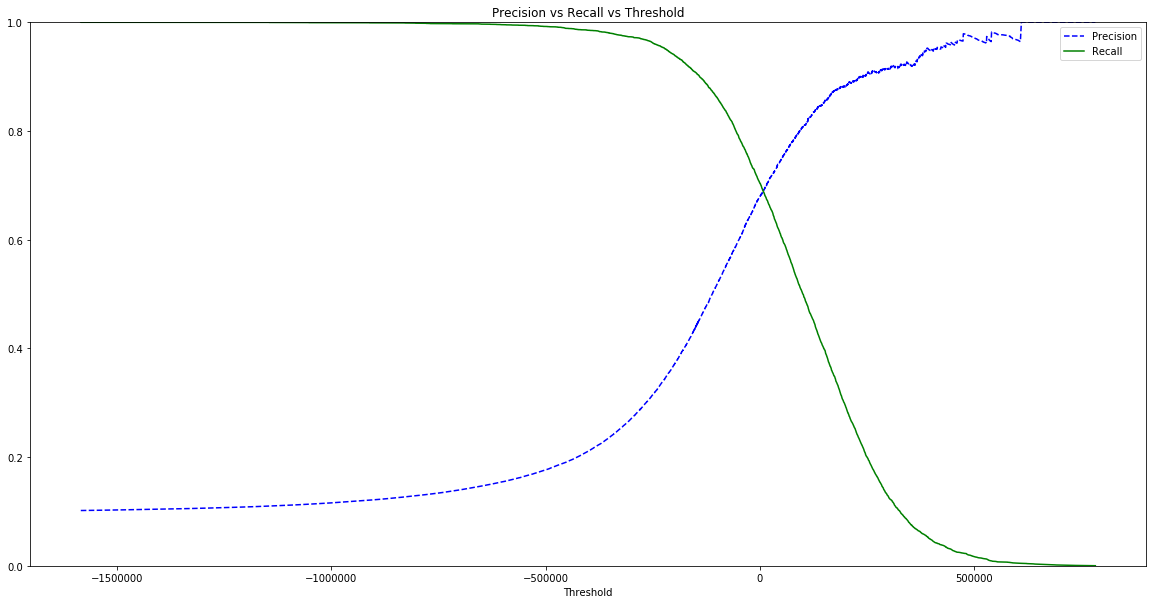

In [44]:
# Plot the Precision Recall Curve
precision_recall_curve(precisions=precisions, recalls=recalls, thresholds=thresholds)

***So why is the Precision curve bumpier than the recall curve speciall when over 0 threshold. The reason is that the predictions might go down sometimes when the threshold value is increased. On the other hand, the recall can only go down when the threshold is increase, which is why the recall curve looks so smooth.***

In [45]:
# Precision vs Recall Curve
def precision_vs_recall(precisions=None,recalls=None):
    plt.figure(figsize=(20,10))
    plt.plot(precisions,recalls)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision vs Recall')

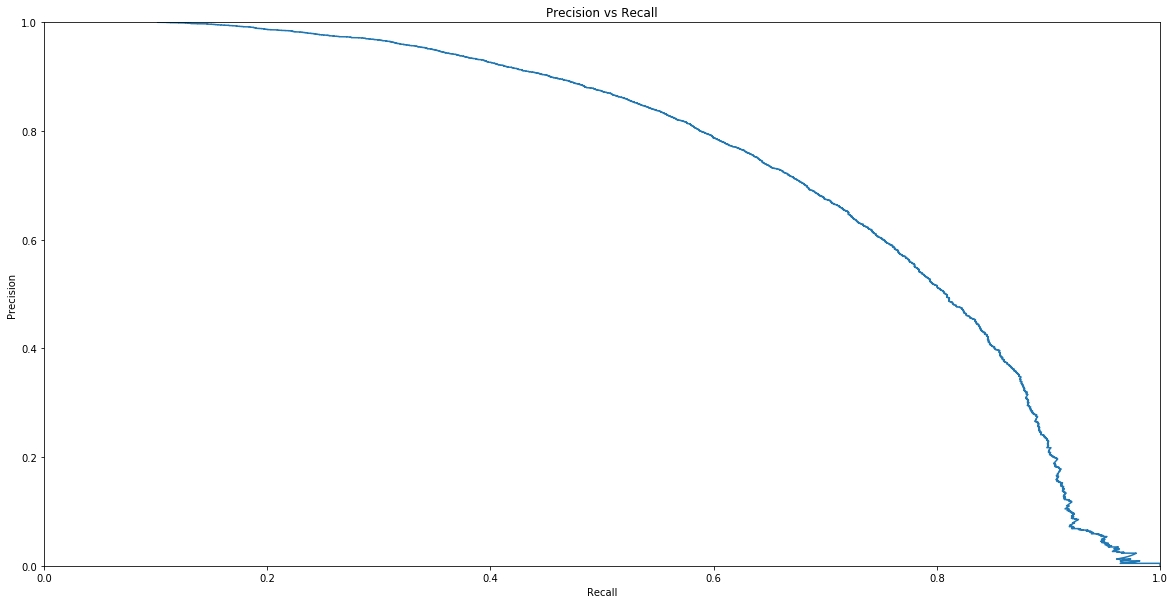

In [46]:
# Precision vs Recall Curve
precision_vs_recall(precisions=precisions, recalls=recalls)

## ROC Curve

***ROC*** or ***Reciever Operating Characteristic curve*** plots the True Positive Rate (recall) w.r.t False Positive Rate. The false positive rate is the ratio of negative instances that are incorrectly classified as positive.

False Positive Rate = 1  - True Negative Rate

True Negative Rate: Specitivity

Hence, ROC curve is a plot between *Sensitivity* and *(1 - Specitivity)*.

In [47]:
# ROC Curve
from sklearn.metrics import roc_curve

# False Positive Rate, True Positive Rate, Thresholds
fpr, tpr, thresholds = roc_curve(y_train_9, y_scores)

print('False Positive Rate: {0}\n\nTrue Positive Rate: {1}\n\nThresholds: {2}'.format(fpr,tpr,thresholds))

False Positive Rate: [0.00000000e+00 0.00000000e+00 1.85010453e-05 ... 9.71970916e-01
 9.71970916e-01 1.00000000e+00]

True Positive Rate: [1.68095478e-04 4.53857791e-03 4.53857791e-03 ... 9.99831905e-01
 1.00000000e+00 1.00000000e+00]

Thresholds: [  783982.58048006   611193.41611782   608917.71576678 ...
 -1585320.99814465 -1585445.82463632 -2898313.24809435]


In [48]:
# Plot the ROC Curve
def plot_roc_curve(fpr=None, tpr=None, label=None):
    plt.figure(figsize=(20,10))
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate (1 -  Specitivity)')
    plt.ylabel('True Positive Rate (Recall or Sensitivity)')
    plt.title('ROC Curve')

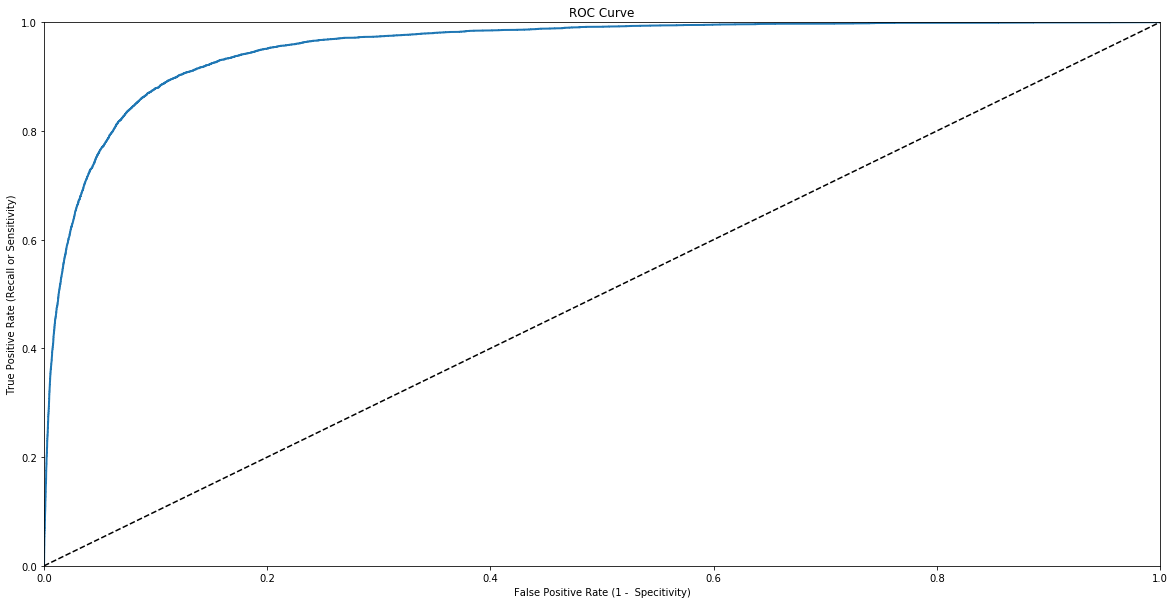

In [49]:
plot_roc_curve(fpr=fpr,tpr=tpr)

Once again here we have a tradeoff. The higher the recall (TPR), the more is the False Positive Rate. So, for this we can check the ***Area Under Curve (AUC)***.

In [50]:
# AUC Score
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_9, y_scores)

0.9546183944197016

### Train a Random Forest Classifier and Compare Performance with SGD Classifier

In [51]:
# To get the prediciton scores for the RFC we need to use 'dict_proba()' as 'decision_function()' is not available in RFC

# Import Dependencies
from sklearn.ensemble import RandomForestClassifier

# Initialize the Classifier
rfc_clf = RandomForestClassifier(random_state=101)
y_probb_rfc = cross_val_predict(rfc_clf, X_train, y_train_9, cv=3, method='predict_proba')
y_probb_rfc

array([[0.6, 0.4],
       [1. , 0. ],
       [0.9, 0.1],
       ...,
       [0.9, 0.1],
       [0.9, 0.1],
       [0.1, 0.9]])

In [52]:
# Get scores from Probabilities
y_scores_rfc = y_probb_rfc[:,1]

# Get False Positive RATE, True Positive Rate, Threshold Values
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_train_9, y_scores_rfc)

print('False Positive Rate: {0}\n\nTrue Positive Rate: {1}\n\nThresholds: {2}'.format(fpr_rfc,tpr_rfc,thresholds_rfc))

False Positive Rate: [0.00000000e+00 3.70020906e-05 9.25052265e-05 3.88521951e-04
 9.06551220e-04 2.53464321e-03 5.36530314e-03 1.15076502e-02
 2.51614216e-02 6.28110488e-02 1.87434090e-01 1.00000000e+00]

True Positive Rate: [0.         0.22961842 0.43368633 0.59169608 0.7098672  0.7881997
 0.85442932 0.90267272 0.93914944 0.9663809  0.98436712 1.        ]

Thresholds: [2.  1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1 0. ]


In [53]:
# Plot the ROC Curve
def plot_roc_curve(fpr=None, tpr=None, label=None):
    #plt.figure(figsize=(20,10))
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate (1 -  Specitivity)')
    plt.ylabel('True Positive Rate (Recall or Sensitivity)')
    plt.title('ROC Curve')

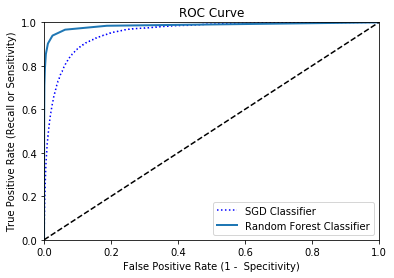

In [54]:
# Plot ROC Curve for SGD vs RFC

# Plot SGD Data
plt.plot(fpr,tpr,'b:',label='SGD Classifier')

# Plot ROC Curve for RFC
plot_roc_curve(fpr=fpr_rfc, tpr=tpr_rfc,label='Random Forest Classifier')

plt.legend(loc='best')

In [55]:
# ROC AUC Score for RFC
roc_auc_score(y_train_9,y_scores_rfc)

0.9856660438043612

The above ROC Curve plots a performance comparison between an RFC Classifier and a SGD Classifier. The RFC Classifier is more near to the top left of the curve and hence performs better. In terms of numbers, RFC attains an ROC AUC score of about 99% whereas an SGD attained a score of 96.4%.

Using this method and plots, we can easily compare the performance of different classifiers on the dataset and choose a right classifier for our requirements.

## MultiClass Classification

***One-vs-All or One-vs-the-Rest Stratergy  [Preferred for Binary Classification]***

The Binary classifiers are made to classifiy between two classes only. Hence, to use them for MultiClass Classification, we can use the one-vs-all stratergy. In this, we can create a system that trains 10 binary classifiers for MNIST data, one for each digit. Then when we want to classify the test image, we can get the decision score from each classifier for that image and we can select the class whose classifier outputs the maximum score.

***One-vs-One Stratergy  [Preferred when Dataset is Large]***

Another stratergy is to train a binary classifier for evey pair of digits like 0,1; 1,2; 2,3; and so on. If there are N number of classes then we need to train **N x (N - 1) / 2**  classifiers. For MNIST this means training 45 classifiers. For the test image, run the image through all the 45 classifiers and see which one gives the best result.

In [56]:
# To see that how Scikit-Learn uses OvO under the hood
n = np.random.randint(0,X_test.shape[0],1)

# Train SGD Classifier to detect all 10 digits
clf.fit(X_train, y_train)

# Get SGD Classifier Decision Function to get one score per class
digit_score = clf.decision_function(X_test[n])
digit_score

c:\users\hare krishna\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([[-394081.79742637, -218600.33615342, -605182.48842589,
        -991533.72910366, -458879.68001353, -166480.50881788,
        -117435.29345535, -799512.6301636 , -156016.64593428,
        -910571.8622109 ]])

***So, as we can see, under the hood, Scikit-Learn used One-vs-All Stratergy to make a decision. Due to that stratergy, we get 10 decision scores and the final score is the one that has the highest value. So, it trained 10 different binary classifiers for this task and each classifier gave their probability for the test digit.***

In [57]:
# Max Score
np.argmax(digit_score)

6

In [58]:
# Print the Classes 
clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [59]:
clf.classes_[1]

1.0

In [60]:
# Confirm the Label from the Target Label at same index
y_test[n]

array([8.])

### Forcing Scikit-Learn to use OvO or OvA Classifier

In [61]:
# Import Dependencies
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=101))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict(X_test[n])

c:\users\hare krishna\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\hare krishna\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will

c:\users\hare krishna\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\hare krishna\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will

c:\users\hare krishna\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\hare krishna\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will

array([8.])

So, what did Scikit-Learn do here. We used a One-vs-One Approach. So, it created N x (N-1)/2 number of binary classifiers i.e. 45 in case of MNIST and each one made a prediction for the test image. Let's check out the Number of Estimators this used.

In [62]:
# Number of Estimators Used
# N x (N - 1) / 2 => 45 for MNIST
len(ovo_clf.estimators_)

45

### Using Normalization to Improve Prediction Score

In [63]:
# Import Dependencies
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

c:\users\hare krishna\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\hare krishna\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will

array([0.90991802, 0.90864543, 0.91138671])

## Error Analysis

### Confusion Matrix

In [64]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(random_state=101)
clf.fit(X_train, y_train)
y_train_pred = cross_val_predict(clf, X_train_scaled, y_train, cv=3)
y_train_pred

c:\users\hare krishna\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\hare krishna\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will

array([7., 5., 3., ..., 7., 9., 9.])

In [65]:
# Get Confusion Matrix
conf_mat = confusion_matrix(y_train, y_train_pred)
conf_mat

array([[5735,    2,   21,    7,   10,   50,   46,    8,   39,    5],
       [   1, 6452,   52,   28,    6,   38,   10,    9,  132,   14],
       [  56,   37, 5336,   91,   76,   28,   88,   59,  172,   15],
       [  51,   38,  149, 5340,    2,  227,   36,   52,  142,   94],
       [  17,   26,   43,   10, 5357,   11,   57,   32,   78,  211],
       [  75,   34,   36,  191,   77, 4590,  114,   30,  178,   96],
       [  37,   19,   40,    2,   38,   85, 5645,    7,   45,    0],
       [  24,   23,   72,   35,   53,   10,    7, 5811,   15,  215],
       [  57,  144,   73,  145,   14,  158,   56,   26, 5044,  134],
       [  42,   31,   30,   89,  142,   37,    2,  214,   73, 5289]],
      dtype=int64)

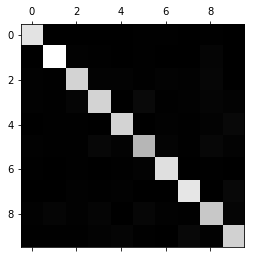

In [66]:
plt.matshow(conf_mat, cmap='gray')

Since, the maximum values are on the diagonal, represented by the white colored blocks, this means that the classifier has done a good job classifying the digits.

### Compare Error Rates

In [67]:
# We need to divide each value in the confusion matrix by number of images in corresponding class to get error rates
row_sums = conf_mat.sum(axis=1, keepdims=True)
normalized_sum = conf_mat / row_sums
normalized_sum

array([[9.68259328e-01, 3.37666723e-04, 3.54550059e-03, 1.18183353e-03,
        1.68833361e-03, 8.44166807e-03, 7.76633463e-03, 1.35066689e-03,
        6.58450110e-03, 8.44166807e-04],
       [1.48323939e-04, 9.56986058e-01, 7.71284485e-03, 4.15307031e-03,
        8.89943637e-04, 5.63630970e-03, 1.48323939e-03, 1.33491546e-03,
        1.95787600e-02, 2.07653515e-03],
       [9.39912722e-03, 6.21013763e-03, 8.95602551e-01, 1.52735817e-02,
        1.27559584e-02, 4.69956361e-03, 1.47700571e-02, 9.90265190e-03,
        2.88687479e-02, 2.51762336e-03],
       [8.31838199e-03, 6.19801011e-03, 2.43027239e-02, 8.70983526e-01,
        3.26211059e-04, 3.70249551e-02, 5.87179905e-03, 8.48148752e-03,
        2.31609852e-02, 1.53319198e-02],
       [2.90996234e-03, 4.45053064e-03, 7.36049298e-03, 1.71174255e-03,
        9.16980486e-01, 1.88291681e-03, 9.75693256e-03, 5.47757617e-03,
        1.33515919e-02, 3.61177679e-02],
       [1.38350858e-02, 6.27190555e-03, 6.64084117e-03, 3.52333518e-02,
   

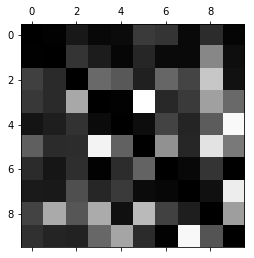

In [68]:
# Let's fill the diagonal with zeros to keep only the errors
np.fill_diagonal(normalized_sum, 0)
plt.matshow(normalized_sum, cmap='gray')

As we can see in the error plot above, the columns 8 and 9 have the maximu brightness i.e. more number of images get misclassified as an 8 or 9 as compared to the other digits.

On the other hand, some rows like 0 and 1 are pretty dark that tells that the classifier does a great job at classifying them.

So, based on this plot, our effort should be more on avoiding the misclassification of 8's and 9's maybe by adding more data or other techniques like using computer vision with OpenCV.

In [69]:
# Helper Function
import matplotlib
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

In [70]:
# Analyzing Individual Errors
class_a, class_b = 3,5
X_aa = X_train[(y_train == class_a) & (y_train_pred == class_a)]
X_ab = X_train[(y_train == class_a) & (y_train_pred == class_b)]
X_ba = X_train[(y_train == class_b) & (y_train_pred == class_a)]
X_bb = X_train[(y_train == class_b) & (y_train_pred == class_b)]

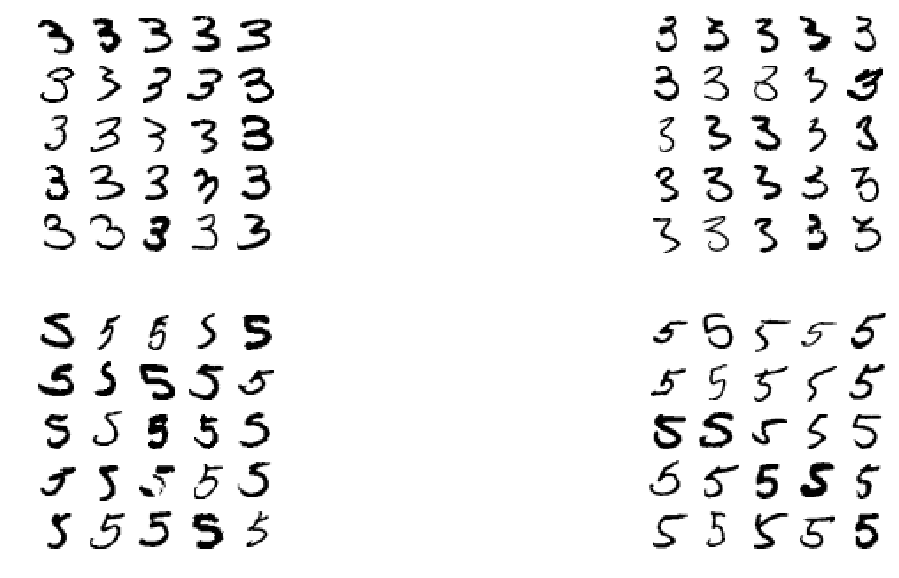

In [71]:
# Plot the Analysis
plt.figure(figsize=(20,10))
plt.subplot(221)
plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222)
plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223)
plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224)
plot_digits(X_bb[:25], images_per_row=5)

The top Left images show the images that are correctly classified as a "3" and the images in the bottom right shows the images correctly classifier as a "5".

The images on the bottom left shows the images wrongly classified as a "3" and the images on top right shows the images wrongly classified as a "5".

## Multilabel Classification

In [72]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [73]:
n = np.random.randint(0,X_test.shape[0],1)

knn_clf.predict(X_test[n])

array([[False, False]])

In [74]:
# Target Label
y_test[n]

array([0.])

So, the above code reveals that the number 8 is greater than 7, hence the first label is true and 8 is not an odd number, hence false for the second label.

In [75]:
#y_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
#f1_score(y_multilabel, y_knn_pred, average='weighted')

The above code cell computes the average F1-Score across all labels.

## MultiOutput Classification

In [76]:
# Add Noise to Image
noise = np.random.randint(0,100,(len(X_train),784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100,(len(X_test),784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

Text(0.5,1,'Original Image')

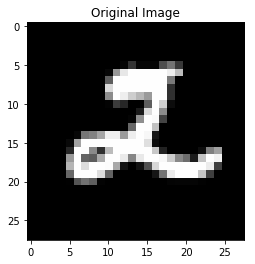

In [77]:
# Plot Noisy Image
n = np.random.randint(0, X_test_mod.shape[0],1)
img = y_test_mod[n].reshape(28,28)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

Text(0.5,1,'Noisy Image')

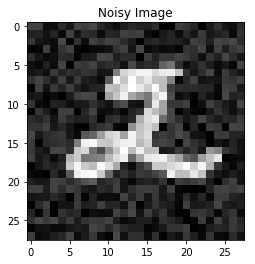

In [78]:
# Plot Noisy Image
img = X_test_mod[n].reshape(28,28)
plt.imshow(img, cmap='gray')
plt.title('Noisy Image')

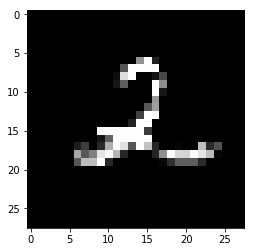

In [79]:
# Fit a KNN Classifier and clean the Noisy Image
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict(X_test_mod[n])
plt.imshow(clean_digit.reshape(28,28), cmap='gray')

Almost there. So, we denoised the image using a KNN Classifier.